# <a href="https://colab.research.google.com/github/AlinaKasiuk/Book-Recommendation-System/blob/main/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratary analisys and data preprocessing

Firstly the dataset used in the Project (Book-Crossing Dataset) should be downloaded.
You can do it automaticaly using <b>Dataset_Downloading.ipynb</b> or use the following the link: http://www.informatik.uni-freiburg.de/~cziegler/BX

####  Install the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

#### General observations

Choose the dateset folder and obsereve which files are saved in it:

In [2]:
print(os.listdir('./Datasets/'))

['BX-Book-Ratings.csv', 'BX-Books.csv', 'BX-Users.csv', 'Datasets']


As we see, the archive contains three files: <i>'BX-Book-Ratings.csv', 'BX-Books.csv', 'BX-Users.csv'</i>. Let's open and analyze each of them.

In [3]:
rating = pd.read_csv('./Datasets/BX-Book-Ratings.csv', delimiter=';', encoding= 'unicode_escape')
rating.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [4]:
rRow, rCol = rating.shape
print(f'The file BX-Book-Ratings.csv (dataset rating) has {rRow} rows and {rCol} columns')

The file BX-Book-Ratings.csv (dataset rating) has 1149780 rows and 3 columns


<b>The file 'BX-Book-Ratings.csv' contains the book evaluations made by users</b>

Let's draw the histogram.

<AxesSubplot:>

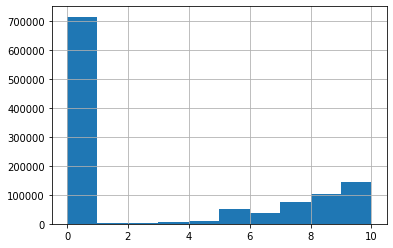

In [5]:
rating['Book-Rating'].hist()

It can be seen that the major part of the ratings posted by users are zeros. It probably occuress because a users normally rates some books but not all the boks. So let's clean the data to use only positive evaluations.

In [6]:
rating =rating[rating['Book-Rating']>0]

<AxesSubplot:>

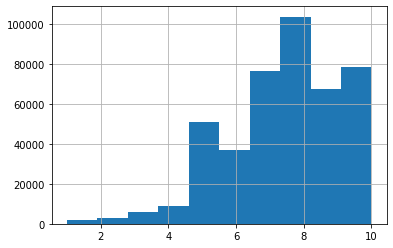

In [7]:
rating['Book-Rating'].hist()

In [8]:
rRow, rCol = rating.shape
print(f' {rRow} rows left in the dataset rating')

 433671 rows left in the dataset rating


Now let's open the file <i>BX-Books.csv</i>

In [9]:
book = pd.read_csv('./Datasets/BX-Books.csv', delimiter=';', encoding= 'unicode_escape', on_bad_lines='skip', low_memory=False)
book.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

<b>Here we see that the file 'BX-Books.csv' contains the information about the books: their publication dates, publisher, author and links to the book images. </b>

Let's join the files <i>'BX-Book-Ratings.csv'</i> and <i>'BX-Books.csv'</i> into one Dataset. We do not choose the image links as we will not use it for this Project.

In [10]:
book = pd.read_csv('./Datasets/BX-Books.csv', usecols=range(5), delimiter=';', encoding= 'unicode_escape', on_bad_lines='skip', low_memory=False)
book_rating = pd.merge(rating, book, on='ISBN')
cols = ['Year-Of-Publication', 'Publisher', 'Book-Author']
book_rating.head()

User-ID        ISBN  Book-Rating  \
0   276726  0155061224            5   
1   276729  052165615X            3   
2   276729  0521795028            6   
3   276744  038550120X            7   
4    11676  038550120X           10   

                                          Book-Title    Book-Author  \
0                                   Rites of Passage     Judith Rae   
1                                     Help!: Level 1  Philip Prowse   
2  The Amsterdam Connection : Level 4 (Cambridge ...    Sue Leather   
3                                    A Painted House   JOHN GRISHAM   
4                                    A Painted House   JOHN GRISHAM   

  Year-Of-Publication                   Publisher  
0                2001                      Heinle  
1                1999  Cambridge University Press  
2                2001  Cambridge University Press  
3                2001                   Doubleday  
4                2001                   Doubleday

In [11]:
brRow, brCol = book_rating.shape
print(f'Now we have got the book_rating dataset with {brRow} rows yand {brCol} columns')

Now we have got the book_rating dataset with 383852 rows yand 7 columns


Now let's open the file <i>BX-Users.csv</i>


In [12]:
user = pd.read_csv('./Datasets/BX-Users.csv', delimiter=';', encoding= 'unicode_escape')
user.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [13]:
uRow, uCol = user.shape
print(f'The file BX-Users.csv (dataset rating) has {uRow} rows and {uCol} columns')

The file BX-Users.csv (dataset rating) has 278858 rows and 3 columns


<AxesSubplot:>

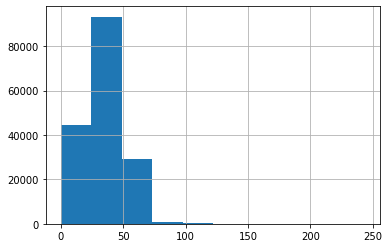

In [14]:
user['Age'].hist()

It seems that some data has error because some users are over 200 years old.
We remove the information for users who are over 100.

In [23]:
user =user[user['Age']<100]

<AxesSubplot:>

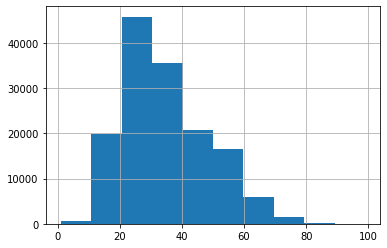

In [24]:
user['Age'].hist()

Our datasets are too large in size, but few books have a good number of ratings to do a good analysis.
We filter the books that have at least 20 evaluation points in total and the users who have given 10 evaluation points in total.

In [25]:
rating_count = (book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'RatingCount_book'})
     [['Book-Title', 'RatingCount_book']]
    )

threshold = 20
rating_count = rating_count.query('RatingCount_book >= @threshold')

In [26]:
user_rating = pd.merge(rating_count, book_rating, left_on='Book-Title', right_on='Book-Title', how='left')
user_rating.head()

Book-Title  RatingCount_book  User-ID        ISBN  Book-Rating  \
0  'Salem's Lot                22    33283  0451168089           10   
1  'Salem's Lot                22    56044  0451168089            8   
2  'Salem's Lot                22    60263  0451168089           10   
3  'Salem's Lot                22    70065  0451168089            5   
4  'Salem's Lot                22    71712  0451168089            5   

    Book-Author Year-Of-Publication    Publisher  
0  Stephen King                1990  Signet Book  
1  Stephen King                1990  Signet Book  
2  Stephen King                1990  Signet Book  
3  Stephen King                1990  Signet Book  
4  Stephen King                1990  Signet Book

In [27]:
user_count = (user_rating.
     groupby(by = ['User-ID'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'RatingCount_user'})
     [['User-ID', 'RatingCount_user']]
    )

threshold = 10
user_count = user_count.query('RatingCount_user >= @threshold')

In [28]:
combined = user_rating.merge(user_count, left_on = 'User-ID', right_on = 'User-ID', how = 'inner')
combined.head()

Book-Title  RatingCount_book  User-ID  \
0                                    'Salem's Lot                22    33283   
1                                    Dragon Tears                38    33283   
2  GARDEN OF SHADOWS (Dollanger Saga (Paperback))                27    33283   
3                         Not Without My Daughter                24    33283   
4                                   The Dead Zone                58    33283   

         ISBN  Book-Rating           Book-Author Year-Of-Publication  \
0  0451168089           10          Stephen King                1990   
1  0425140032            9        Dean R. Koontz                1995   
2  067164257X           10  Ariel Jennifer Jones                1987   
3  0312925883           10        Betty Mahmoody                1993   
4  0451155750            6          Stephen King                2004   

                  Publisher  RatingCount_user  
0               Signet Book                10  
1  Berkley Publishing Group                10  
2                    Pocket                10  
3        St. Martin's Press                10  
4               Signet Book                10

In [30]:
combined = user_rating.merge(user_count, left_on = 'User-ID', right_on = 'User-ID', how = 'inner')
combined.head()

Book-Title  RatingCount_book  User-ID  \
0                                    'Salem's Lot                22    33283   
1                                    Dragon Tears                38    33283   
2  GARDEN OF SHADOWS (Dollanger Saga (Paperback))                27    33283   
3                         Not Without My Daughter                24    33283   
4                                   The Dead Zone                58    33283   

         ISBN  Book-Rating           Book-Author Year-Of-Publication  \
0  0451168089           10          Stephen King                1990   
1  0425140032            9        Dean R. Koontz                1995   
2  067164257X           10  Ariel Jennifer Jones                1987   
3  0312925883           10        Betty Mahmoody                1993   
4  0451155750            6          Stephen King                2004   

                  Publisher  RatingCount_user  
0               Signet Book                10  
1  Berkley Publishing Group                10  
2                    Pocket                10  
3        St. Martin's Press                10  
4               Signet Book                10

In [31]:
print('Unique books: ', combined['Book-Title'].nunique())
print('Unique users: ', combined['User-ID'].nunique())

Unique books:  2333
Unique users:  2200


 #### Now we have a good size dataset that we are going to use for the following project.